<a href="https://colab.research.google.com/github/raquel-maia/python-dados/blob/main/Probabilidade_e_Amostragem_Desafio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

import seaborn as sns #visualização de dados
import matplotlib.pyplot as plt #visualização de dados

In [ ]:
import numpy as np #manipulação de dados

In [ ]:
from scipy.stats import norm #biblioteca para estatística

In [ ]:
populacao_df = pd.read_csv("populacao_brasileira.csv.csv", sep = ',')

In [ ]:
populacao_df.head(100)

,Unnamed: 0,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,0,MA,56,Fundamental,Intermediário,4006.29,F
1,1,BA,46,Superior,Básico,2423.11,M
2,2,AM,32,Fundamental,Intermediário,3835.69,M
3,3,CE,60,Superior,Básico,1870.29,M
4,4,SE,25,Fundamental,Avançado,3529.80,M
...,...,...,...,...,...,...,...
95,95,PI,24,Pós-graduação,Intermediário,2573.12,M
96,96,RS,26,Pós-graduação,Avançado,1987.90,F
97,97,AM,41,Superior,Intermediário,1345.14,F
98,98,MA,18,Fundamental,Intermediário,3823.17,M


##verificar os tipos de dados


In [ ]:
num_linhas, num_colunas = populacao_df.shape
tipos_de_variaveis = populacao_df.dtypes

print("Numero de linhas:", num_linhas)
print("Numero de Colunas:", num_colunas)
display("Tipos de variáveis:", tipos_de_variaveis)

Numero de linhas: 1000
Numero de Colunas: 7


'Tipos de variáveis:'

Unnamed: 0                           int64
estado                              object
idade                                int64
escolaridade                        object
nível de proficiência em inglês     object
renda                              float64
sexo                                object
dtype: object

##verificando o describe para obter as frequencias e medidas das variáveis numéricas

In [ ]:
populacao_df.describe()

,Unnamed: 0,idade,renda
count,1000.000000,1000.000000,1000.000000
mean,499.500000,40.986000,3082.537180
std,288.819436,13.497852,996.572239
min,0.000000,18.000000,103.740000
25%,249.750000,29.000000,2425.815000
50%,499.500000,42.000000,3076.415000
75%,749.250000,52.000000,3714.487500
max,999.000000,64.000000,5632.380000


### Atividade

1. Considere pessoas fluentes em inglês, qual a probabilidade
complementar? Ou seja, qual a probabilidade de escolhermos uma
pessoa aleatória e ela não ser fluente em inglês. Considere fluente
quem tem o nível avançado.


In [ ]:
# Filtrar as pessoas que são fluentes em inglês no nível avançado
fluente_ingles_avancado = populacao_df[populacao_df['nível de proficiência em inglês'] == 'Avançado']

# Contar o número total de pessoas na amostra (TP)
total_pessoas = len(populacao_df)

# Contar o número de pessoas fluentes em inglês no nível avançado (FE)
fluentes_avancado = len(fluente_ingles_avancado)

# Calcular a probabilidade de uma pessoa ser fluente em inglês no nível avançado (PFE)
probabilidade_fluente_avancado = fluentes_avancado / total_pessoas

# Calcular a probabilidade complementar (CO)
probabilidade_complementar = (1 - probabilidade_fluente_avancado)


print("Probabilidade complementar de escolher uma pessoa não fluente em inglês avançado: {:.2%}".format(probabilidade_complementar) )

Probabilidade complementar de escolher uma pessoa não fluente em inglês avançado: 65.60%


2. Se uma pessoa escolhida aleatoriamente for de Alagoas ou do Pará,
qual é a probabilidade de ela ter uma renda superior a 5 mil reais?


In [ ]:
alagoas_ou_para = populacao_df[(populacao_df['estado'] == 'AL') | (populacao_df['estado'] == 'PA')]

# Contar o número total de pessoas de Alagoas ou do Pará
total_alagoas_ou_para = len(alagoas_ou_para)

# Contar o número de pessoas de Alagoas ou do Pará com renda superior a 5000
renda_5k = len(alagoas_ou_para[alagoas_ou_para['renda'] >= 5000])

# Calcular a probabilidade
probabilidade = renda_5k / total_alagoas_ou_para

print("Na análise dos estados de Alagoas e Pará, tivemos um total de {} pessoas. E, a probabilidade de uma pessoa de Alagoas ou do Pará ter uma renda superior a 5 mil reais é: {:.2%}".format(total_alagoas_ou_para, probabilidade)) # é um exemplo de probabilidade condicional que e um evento ocorrer, dado que outro evento já ocorreu. .


Na análise dos estados de Alagoas e Pará, tivemos um total de 79 pessoas. E, a probabilidade de uma pessoa de Alagoas ou do Pará ter uma renda superior a 5 mil reais é: 5.06%


3. Descubra a probabilidade de uma pessoa ter ensino superior completo
no estado do Amazonas. Qual a probabilidade da quinta pessoa que
você conversar, que é amazonense, ter ensino superior completo?


In [ ]:
from scipy.stats import geom

In [ ]:


# Filtrar o DataFrame para incluir apenas pessoas do estado do Amazonas
pessoas_amazonas = populacao_df.loc[populacao_df['estado'] == 'AM']

# Total de pessoas do Amazonas
total_pessoas_am = len(pessoas_amazonas)

# Filtrar pessoas do Amazonas com ensino superior completo ou pós-graduação
nivel_escolar = pessoas_amazonas.loc[pessoas_amazonas['escolaridade'].isin(['Superior', 'Pós-graduação'])]

# Total de pessoas do Amazonas com ensino superior completo ou pós-graduação
total_superior_pos_grad = len(nivel_escolar)

# Calculando a probabilidade de uma pessoa amazonense ter ensino superior completo ou pós-graduação
probabilidade_efetiva = total_superior_pos_grad / total_pessoas_am

# Probabilidade de não encontrar uma pessoa com ensino superior completo nos primeiros quatro encontros
probabilidade_complementar = (1 - probabilidade_efetiva) ** 4

# Probabilidade de encontrar uma pessoa com ensino superior completo no quinto encontro
prob_pessoa_5_superior = probabilidade_efetiva

# Probabilidade total
prob_total = probabilidade_complementar * prob_pessoa_5_superior

print("A probabilidade de a quinta pessoa, que é amazonense, que você conversar ter ensino superior completo é {:.2%}:".format(prob_total) )

A probabilidade de a quinta pessoa, que é amazonense, que você conversar ter ensino superior completo é 2.21%:


4. Considerando a renda das pessoas do nosso conjunto, podemos dizer
que a renda de uma pessoa brasileira está na sua maioria em que faixa
(faça faixa de 1.500 reais)? Qual é a sua função densidade de
probabilidade?

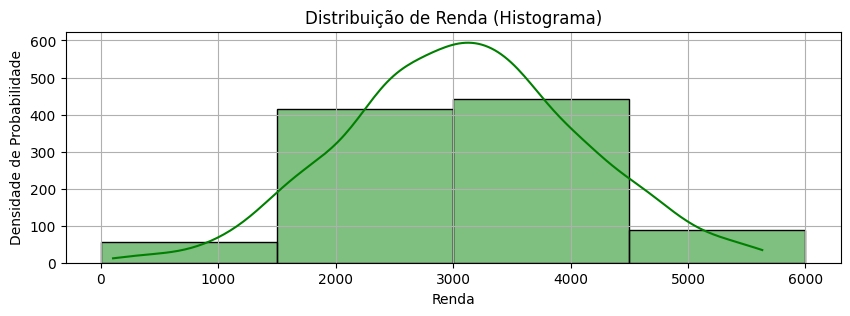

Renda a (0 - 1500.00): 55
Renda b (1501 - 3000): 414
Renda c (3001 - 4500): 443
Renda d (4501 - 6000): 88


In [ ]:
# Definindo os bins para dividir as faixas salariais de 1500 em 1500
bins = [0, 1501, 3001, 4501, 6000]

# Criando categorias com base nas faixas salariais definidas pelos bins
categorias_renda = pd.cut(populacao_df['renda'], bins=bins, labels=['renda a', 'renda b', 'renda c', 'renda d'], include_lowest=True)

# Contando o número de pessoas em cada faixa salarial
contagem_por_faixa = categorias_renda.value_counts()

# Plotando o histograma com densidade
plt.figure(figsize=(10, 3))
sns.histplot(populacao_df['renda'], bins=bins, color='green', kde=True)

plt.title('Distribuição de Renda (Histograma)')
plt.xlabel('Renda')
plt.ylabel('Densidade de Probabilidade')
plt.grid(True)
plt.show()

# Imprimindo o número de pessoas em cada faixa
print("Renda a (0 - 1500.00):", contagem_por_faixa['renda a'])
print("Renda b (1501 - 3000):", contagem_por_faixa['renda b'])
print("Renda c (3001 - 4500):", contagem_por_faixa['renda c'])
print("Renda d (4501 - 6000):", contagem_por_faixa['renda d'])




5 - Calcule a média e a variância da renda da amostra. Depois faça a
distribuição normal, inclua o gráfico.


Média da renda: 3082.5371800000003
Variância da renda: 993156.2281676152


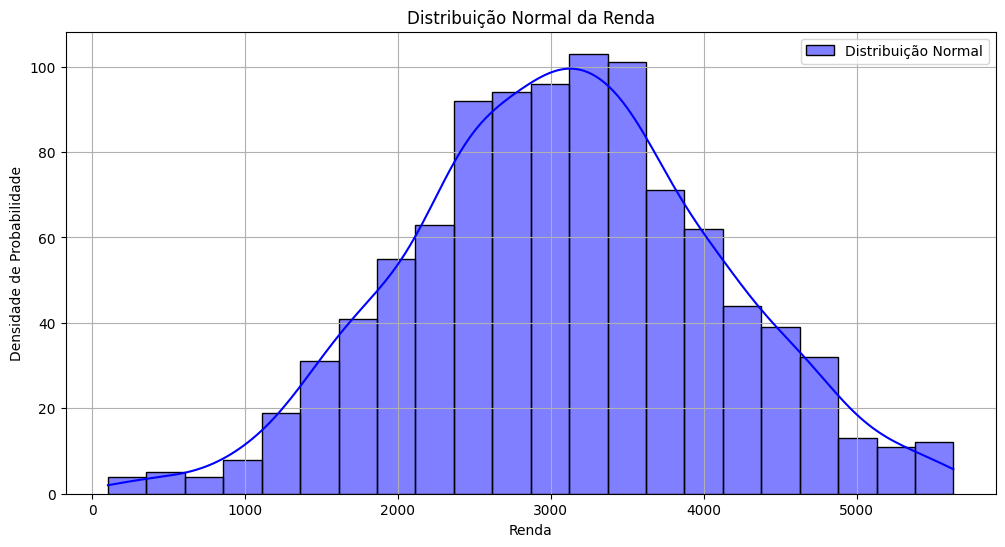

In [ ]:
# Calculando média e variância da renda da amostra
media_renda = populacao_df['renda'].mean() #é a soma de todas as rendas dividida pelo número de pessoas (aqui utilizei a função)
variancia_renda = populacao_df['renda'].var() # é a diferença de cada individuo - a renda média, elevado ao quadrado. soma((RENDA DE CADA - RENDA_MEDIA)^2)(aqui utilizei a função)

print("Média da renda:", media_renda)
print("Variância da renda:", variancia_renda)

# Plotando a distribuição normal
plt.figure(figsize=(12, 6))
sns.histplot(populacao_df['renda'], kde ="True", color='blue', label='Distribuição Normal')

plt.title('Distribuição Normal da Renda')
plt.xlabel('Renda')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(True)
plt.show()

6. Primeiro considere a probabilidade encontrada no nosso conjunto de
pessoas com escolaridade de pós-graduação. Considerando a amostra
de população brasileira com 1 milhão de habitantes, qual a
probabilidade de encontrarmos 243 mil pessoas com pós-graduação?


In [ ]:
from scipy.stats import binom

In [ ]:
# Filtrar o DataFrame para incluir apenas pessoas com escolaridade de pós-graduação
populacao_pos_graduado = populacao_df[populacao_df["escolaridade"] == "Pós-graduação"]
total_pos_graduado = len(populacao_pos_graduado)

# Tamanho total da população
tamanho_total_populacao = len(populacao_df)

# Probabilidade de selecionar uma pessoa com pós-graduação
probabilidade_pos_graduado = total_pos_graduado / tamanho_total_populacao

nova_amostra = 1000000 #amostra de 1 milhão de habitantes

# Tamanho da população
tamanho_populacao = 1000000  # 1 milhão de habitantes

# Número de pessoas com pós-graduação desejado na amostra
num_pessoas_pos_graduado_amostra = 243000

# Calcular a probabilidade usando a distribuição binomial
probabilidade = binom.pmf(num_pessoas_pos_graduado_amostra, tamanho_populacao, probabilidade_pos_graduado)

print("A probabilidade de encontrarmos 243 mil pessoas com pós-graduação na amostra é de aproximadamente:", probabilidade)

A probabilidade de encontrarmos 243 mil pessoas com pós-graduação na amostra é de aproximadamente: 1.1104854289794913e-119


7. Somando as densidades nós temos a função de densidade acumulada.
Considerando a coluna ‘Escolaridade’ faça a função de densidade
acumulada discreta para cada nível de escolaridade.

Densidade Acumulada Discreta para cada nível de escolaridade:
Fundamental       26.60%
Pós-graduação     51.90%
Superior          76.20%
Médio            100.00%
Name: escolaridade, dtype: object


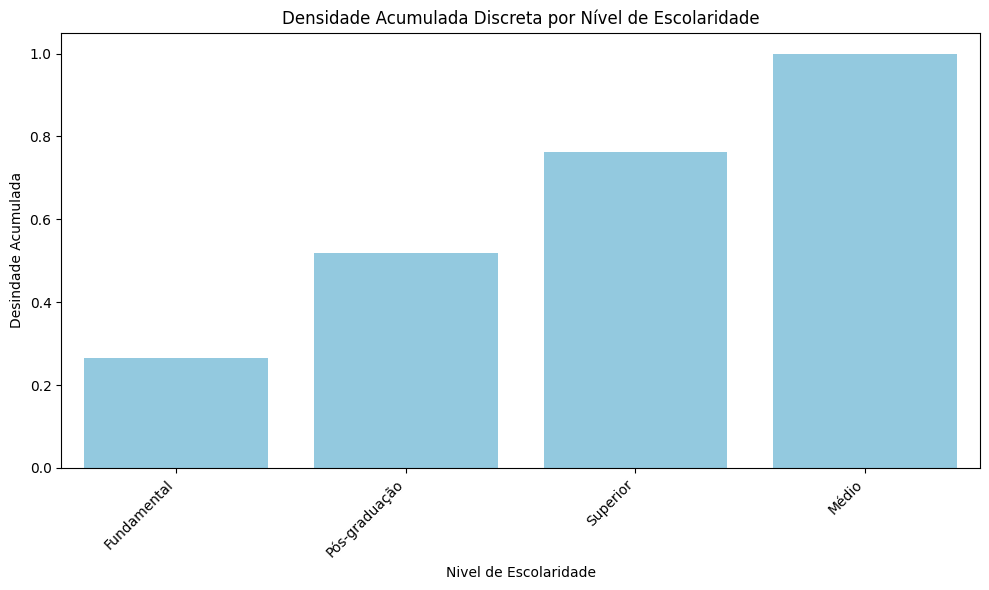

In [ ]:
# Calcular a densidade acumulada discreta para cada nível de escolaridade utilizando o cumsum
densidade_acumulada_por_escolaridade = populacao_df['escolaridade'].value_counts(normalize=True).cumsum()

print("Densidade Acumulada Discreta para cada nível de escolaridade:")
print(densidade_acumulada_por_escolaridade.map("{:.2%}".format))
plt.figure(figsize=(10,6))
sns.barplot(x=densidade_acumulada_por_escolaridade.index, y=densidade_acumulada_por_escolaridade.values, color='skyblue')
plt.title('Densidade Acumulada Discreta por Nível de Escolaridade')
plt.xlabel('Nivel de Escolaridade')
plt.ylabel('Desindade Acumulada')
plt.xticks(rotation=45, ha='right')# Define as posições e rótulos dos marcadores do eixo x.
plt.tight_layout() # Ajusta automaticamente o layout do gráfico para garantir que todos os elementos se ajustem corretamente.
plt.show()


8. Qual a margem de erro amostral da proporção populacional
considerando a proporção de pessoas com nível de inglês
intermediário?


In [ ]:
nivel_inter = populacao_df[populacao_df["nível de proficiência em inglês"] == "Intermediário"]
total_nivel_inter = len(nivel_inter)
total_populacao = len(populacao_df)
probabilidade_sucesso = total_nivel_inter / total_populacao
probabilidade_complementar = 1 - probabilidade_sucesso

# Nível de confiança
confianca = 0.95

# Calculando o Z-score correspondente ao nível de confiança
z = norm.ppf((1 + confianca) / 2)

# Agora, calculamos a margem de erro
margem_erro = z * np.sqrt((probabilidade_sucesso * probabilidade_complementar) / total_populacao)

print("Total da população: ", total_populacao)
print("Probabilidade de pessoas com inglês de nível intermediário: {:.2%} ".format(probabilidade_sucesso))
print("Probabilidade de pessoas que não tem inglês de nível intermediário: {:.2%}".format( probabilidade_complementar))
print("\nMargem de erro amostral da proporção populacional: {:.2%}".format(margem_erro))

Total da população:  1000
Probabilidade de pessoas com inglês de nível intermediário: 32.90% 
Probabilidade de pessoas que não tem inglês de nível intermediário: 67.10%

Margem de erro amostral da proporção populacional: 2.91%


**Texto de análise para melhor fixação do exercicio:**
negrito
**Estimativa Pontual:** Calculamos que aproximadamente 32.90% da população tem inglês de nível intermediário.

**Margem de Erro:** Determinamos a margem de erro como 2.91%.

Intervalo de Confiança: Para obter o intervalo de confiança, subtraímos a margem de erro da estimativa pontual para encontrar o limite inferior e adicionamos a margem de erro para encontrar o limite superior.

Limite Inferior: 32.90% - 2.91% = 29.99%
Limite Superior: 32.90% + 2.91% = 35.81%

Portanto, com 95% de confiança, podemos afirmar que o verdadeiro valor da proporção de pessoas com inglês de nível intermediário na população está provavelmente **entre 29.99% e 35.81%.**

Essa conclusão é feita com base na suposição de que a distribuição dos dados segue uma distribuição normal e que a margem de erro nos dá uma ideia da incerteza em torno da nossa estimativa.

9. Calcula a renda da população. Qual a probabilidade de encontrar 60
pessoas com uma renda mil reais superior à média?:

---



In [ ]:

# Calcular a média da renda da população
media_renda_populacao = populacao_df['renda'].mean()

# Suponha que n seja o tamanho da amostra
n_amostra = len(populacao_df)

# Calcular a probabilidade de uma pessoa ter uma renda superior à média + 1000
p_individual = len(populacao_df[populacao_df['renda'] > media_renda_populacao + 1000]) / n_amostra

# Use a probabilidade individual para calcular a probabilidade de exatamente 60 pessoas dentro da amostra terem renda superior à média
probabilidade_60_pessoas_amostra = binom.pmf(60, n_amostra, p_individual)

print("Probabilidade para 60 pessoas dentro da amostra:", probabilidade_60_pessoas_amostra)

Probabilidade para 60 pessoas dentro da amostra: 1.099520565163774e-22



10. Qual a probabilidade de escolhermos alguém do Sudeste que seja
homem, com ensino fundamental e com renda maior que 2 mil reais por
mês?




In [ ]:
# 1. Calcular a probabilidade de ser do Sudeste (RJ, SP, MG, ES)
probabilidade_sudeste = len(populacao_df[populacao_df["estado"].isin(["RJ", "SP", "MG", "ES"])]) / len(populacao_df)

# 2. Calcular a probabilidade de ser homem
probabilidade_homem = len(populacao_df[populacao_df["sexo"] == "M"]) / len(populacao_df)

# 3. Calcular a probabilidade de ter ensino fundamental
probabilidade_ensino_fundamental = len(populacao_df[populacao_df["escolaridade"] == "Fundamental"]) / len(populacao_df)

# 4. Calcular a probabilidade de ter renda maior que 2 mil reais
probabilidade_renda_maior_2mil = len(populacao_df[populacao_df["renda"] > 2000]) / len(populacao_df)

# 5. Multiplicar todas as probabilidades individuais para obter a probabilidade final
probabilidade_final = probabilidade_sudeste * probabilidade_homem * probabilidade_ensino_fundamental * probabilidade_renda_maior_2mil

print("A probabilidade final é:", probabilidade_final)




A probabilidade final é: 0.017414252856
